<a href="https://colab.research.google.com/github/lapshinaaa/homework_machineLearning/blob/main/hw07_trees_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Интеллектуальный анализ данных – весна 2022

# Домашнее задание 7: Деревья. Случайный лес

Правила:

- Домашнее задание оценивается в 10 баллов (+1 бонусный балл).


- Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.


- Можно использовать любые свободные источники с обязательным указанием ссылки на них.


- Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

<!-- ![](https://github.com/hse-ds/iad-intro-ds/blob/master/2023/homeworks/hw07-trees/meme.jpg?raw=1) -->
<img src="https://github.com/hse-ds/iad-intro-ds/blob/master/2023/homeworks/hw07-trees/meme.jpg?raw=1" alt="Drawing" style="width: 700px;"/>

## Часть 1: Основы построения решающие дерева (1.5 балла)

В этой части все расчёты необходимо реализовывать в виде запрограммированных формул, например, на `numpy`. **Нельзя использовать готовые реализации**. Например, если в задании требуется рассчитать энтропию, то требуется в каком-то виде релизовать расчёт по формуле, но нельзя использовать готовую реализацию `some_module.entropy()`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

**Задание 1.1 (0.5 балла)** Пусть известно, что в вершину решающего дерева попали 10 объектов, 8 из которых имеют метку класса $k_1$, а 2 имеют метку класса $k_2$. Рассчитайте энтропию такого распределения классов (с натуральным логарифмом). Ответ округлите до двух знаков после запятой.

In [2]:
def enthropy_calculation(classes: list) -> float:
  ''' function for calculating the value of H (entropy) in a node'''
  num_of_objects = 0
  # calculating how many objects we have in one node
  for k in classes:
    num_of_objects += k

  # calculating probability of each class
  probabilities = [k / num_of_objects for k in classes]

  # calculating entropy:
  H = 0
  for probability in probabilities:
    H -= probability * math.log2(probability)

  # rounding the result:
  entropy = round(H, 2)
  
  return entropy

# defining the number of objects we have:
classes = [8, 2]

print(f'The entropy of the given distribution is equal to: {enthropy_calculation(classes)}')

The entropy of the given distribution is equal to: 0.72


**Задание 1.2 (0.5 балла)** Пусть дополнительно известно, что вершина из предыдущего задания не является листовой и возможно такое разбиение, что в левое поддерево попадут все объекты класса $k_1$, а в правое - класса $k_2$. Посчитайте критерий информативности:

$$
Q(R_m, j, t) = H(R_m) - \frac{|R_\ell|}{|R_m|}H(R_\ell) - \frac{|R_r|}{|R_m|}H(R_r),
$$

где $R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения, $R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

Теперь в качестве $H(R)$ будем использовать индекс Джини:

$$
H(R) = \sum_{k=1}^J p_k(1-p_k),
$$
где $J$ – общее количество классов (в нашем случае, $J = 2$).

Ответ округлите до двух знаков после запятой.

In [3]:
def gini_index(classes_list: list) -> float:
  '''function for calculating the Gini index'''
  total_number = 0
  # calculating how many objects we overall have
  for k in classes_list:
    total_number += k

  # calculating probabilities
  probabilities = [k / total_number for k in classes_list]
  
  # calculating the Gini index:
  gini_index = 0
  for probability in probabilities:
    gini_index += probability * (1 - probability)

  return gini_index


def information_gain_ratio(anc: list, left_node: list, right_node: list) -> float:
  '''function for calculation the information gain ratio'''
  # calculating gini indices for all nodes
  H_Rm = gini_index(anc)
  H_Rl = gini_index(left_node)
  H_Rr = gini_index(right_node)

  # calculating ratios in new nodes:
  left_sum = 0
  right_sum = 0
  overall_count = 0

  for class_value in left_node:
    left_sum += class_value

  for class_value in right_node:
    right_sum += class_value

  for class_value in anc:
    overall_count += class_value

  left_ratio = left_sum / overall_count
  right_ratio = right_sum / overall_count

  # calculating the IGR:
  igr = gini_index(anc) - left_ratio * gini_index(left_node) - right_ratio * gini_index(right_node)

  return igr

# given classes counts:
R_m = [8, 2]
R_l = [8, 0]
R_r = [0, 2]

print(f'Information gain ration is equal to: {round(information_gain_ratio(R_m, R_l, R_r), 2)}')

Information gain ration is equal to: 0.32


**Задание 1.3 (0.5 балла)** Пусть при построении дерева образовалась листовая вершина с 10 объектами, значения целевой переменной для которых следующие: [1, 10, 5, 18, 100, 30, 50, 61, 84, 47] (решается задача регрессии). Чему будут равны предсказания модели для этих объектов?

In [4]:
target_values = [1, 10, 5, 18, 100, 30, 50, 61, 84, 47]
# calculating prediction as a mean value:
prediction = np.mean(target_values)

print(f'Prediction for the given objects is equal to: {prediction}')

Prediction for the given objects is equal to: 40.6


## Часть 2: Решающие деревья (4.5 балла)

В этой части мы напишем и протестируем собственную реализацию решающего дерева.

In [5]:
from collections import Counter
from typing import Dict, List, Tuple, Union

**Задание 2.1 (1.5 балла)** Реализуйте функцию `find_best_split()`, которая должна находить оптимальное разбиение подмножества обучающей выборки в соответствии с информационным критерием из **Задания 1.2**. В качестве меры хаотичности $H(R)$ для задачи регрессии испольуйте дисперсию подвыборки, а для задачи классификации – критерий Джини (определён в том же задании).

Для категориальных признаков применяется наивный алгоритм разбиения: мы пытаемся найти одно значение, разбиение по которому сильнее всего увеличит критерий информативности. Иными словами, объекты с конкретным значением признака отправляем в левое поддерево, остальные - в правое. Обратите внимание, что это далеко не оптимальные способ учёта категориальных признаков. Например, можно было бы на каждое значение категориального признака создавать отдельное поддерево или использовать более сложные подходы. Подробнее об этом можно прочитать в конспектах [лекций](https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture07-trees.pdf) по машинному обучению на ПМИ (раздел «Учёт категориальных признаков»).

В качестве подсказок реализации можете пользоваться кодом из бонусной части семинара по решающим деревьям.

**Бонус:** Разрешается делать цикл для перебора порогов, но возможна имплементация без него. За имплементацию без цикла – **бонус 1 балл**.

In [6]:
def gini_index(target_vector: Union[np.ndarray, pd.Series]) -> float:
  '''
  Function for calculating the Gini index
  :param target_vector: vector of objects belonging to different classes
  :return gini: the value of the Gini index
  '''
  # calculating the count for each class
  classes, counts = np.unique(target_vector, return_counts=True)
  # calculating probability for each class:
  probabilities = counts / len(target_vector)
  # calculating the Gini index:
  gini = 1 - np.sum(probabilities ** 2)

  return gini
  

def find_best_split(
    feature_vector: Union[np.ndarray, pd.DataFrame], 
    target_vector: Union[np.ndarray, pd.Series],
    task: str = "classification",
    feature_type: str = "real"
) -> Tuple[np.ndarray, np.ndarray, float, float]:
    """
    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух соседних (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини или дисперсии нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)
    :param task: либо `classification`, либо `regression`
    :param feature_type: либо `real`, либо `categorical`
    
    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """

    # sorting the initial 'feature_vector' and 'target_vector':
    indices = np.argsort(feature_vector)
    sorted_feature_vector = feature_vector[indices]
    sorted_target_vector = target_vector[indices]

    # calculating all the possible thresholds:
    thresholds = (sorted_feature_vector[:-1] + sorted_feature_vector[1:]) / 2

    # splitting 'sorted_target_vector' based on each threshold and calculating the Gini index:
    if task == 'classification':
      gini_values = np.array([
            (gini_index(sorted_target_vector[sorted_feature_vector <= threshold]) *
             np.sum(sorted_feature_vector <= threshold) +
             gini_index(sorted_target_vector[sorted_feature_vector > threshold]) *
             np.sum(sorted_feature_vector > threshold)) / len(sorted_target_vector)
            for threshold in thresholds
        ])
    else:
        gini_values = np.array([
            (np.var(sorted_target_vector[sorted_feature_vector <= threshold]) *
             np.sum(sorted_feature_vector <= threshold) +
             np.var(sorted_target_vector[sorted_feature_vector > threshold]) *
             np.sum(sorted_feature_vector > threshold)) / len(sorted_target_vector)
            for threshold in thresholds
        ])

    # finding the best threshold(s) with the minimum Gini index
    min_gini_indices = np.where(gini_values == np.min(gini_values))[0] # using [0] because np.where returns a tuple
    thresholds_with_min_gini = thresholds[min_gini_indices]
    threshold_best = np.min(thresholds_with_min_gini)
    gini_best = np.min(gini_values)


    return thresholds, gini_values, threshold_best, gini_best

Эту функцию можно протестировать на датасете `California`.

In [7]:
from sklearn.datasets import fetch_california_housing

In [8]:
data = fetch_california_housing()
X = pd.DataFrame(data=data["data"], columns=data["feature_names"])
y = data["target"]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

Выведите график зависимости значения критерия ошибки от порогового значения при разбиении вершины по признаку `MedInc`.





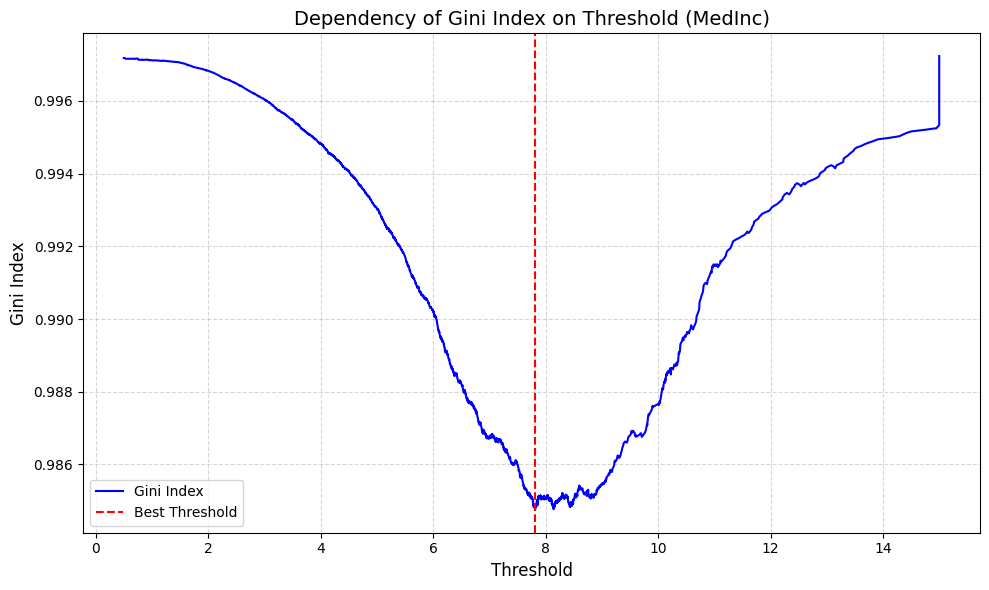

In [10]:
%matplotlib inline

# getting the values of "MedInc" feature and 'target_vector'
feature_vector = X['MedInc'].values
target_vector = y

# calling the 'find_best_split' function
thresholds, gini_values, threshold_best, gini_best = find_best_split(feature_vector, target_vector)

# plotting the graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(thresholds, gini_values, color='b', label='Gini Index')
ax.axvline(x=threshold_best, color='r', linestyle='--', label='Best Threshold')


ax.set_xlabel('Threshold', fontsize=12)
ax.set_ylabel('Gini Index', fontsize=12)
ax.set_title('Dependency of Gini Index on Threshold (MedInc)', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()
plt.tight_layout()

plt.show()

Найдите лучший, с вашей точки зрения, предикат первой вершины решающего дерева.

In [ ]:
# initializing all the necessary variables
best_predicate = None
best_threshold = None
best_criterion_value = None

target_vector = y
# iterating over all the features from X: 
for feature in X.columns:
  feature_vector = X[feature].values

  # calling the function 'find_best_split' and getting all the outputs:
  thresholds, criterion_values, threshold_best, criterion_best = find_best_split(feature_vector, target_vector)

  # checking if the current H_R is better than the previous ones:
  if best_criterion_value is None or criterion_best < best_criterion_value:
    best_criterion_value = criterion_best
    best_predicate = feature
    best_threshold = threshold_best

# printing out the results:
print(f'The best predicate: {best_predicate}')
print(f'The best criterion value: {best_criterion_value}')
print(f'The best threshold value: {best_threshold}')

The best predicate: MedInc
The best criterion value: 0.9847476488023433
The best threshold value: 7.81515


**ВЫВОД:** лучшим предикатом оказался признак 'MedInc'. В таком случае, при установлении threshold(порога) в ~7.8 получаем значение H_R равное 0.984.

**Задание 2.2 (1 балл)** Разберитесь с написанным кодом решающего дерева, заполните пропуски в коде и реализуйте недостающий метод `_predict_node()`.

Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции в разделе «Построение дерева».
- **Выбор лучшего разбиения** необходимо производить по критерию Джини.
- **Критерий останова:** все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку.
- **Ответ в листе:** наиболее часто встречающийся класс в листе.

В задаче также предлагается получить два бонуса, по баллу на каждый!

- **Реализуйте способ обрабатывать пропуски в данных и реализуйте его, пояснив свои действия.**
- **Реализуйте метод оценки важности признаков.**

In [ ]:
class DecisionTree:
    
    def __init__(
        self, 
        feature_types: Union[List[str], np.ndarray], 
        max_depth: int = None, 
        min_samples_split: int = None, 
        min_samples_leaf: int = None,
        task: str = "classification"
    ) -> None:
        
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        # В этой переменной будем хранить узлы решающего дерева. Каждая вершина хранит в себе идентификатор того,
        # является ли она листовой. Листовые вершины хранят значение класса для предсказания, нелистовые - правого и
        # левого детей (поддеревья для продолжения процедуры предсказания)
        self._tree = {}
        
        # типы признаков (категориальные или числовые)
        self._feature_types = feature_types
        
        # гиперпараметры дерева
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self.task = task
        
        # Переменная, если вы решите делать бонус
        self._feature_importances = {}
        

    def _fit_node(
        self, 
        sub_X: np.ndarray, 
        sub_y: np.ndarray, 
        node: dict
    ) -> None:
        
        # критерий останова
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            # подготавливаем признак для поиска оптимального порога
            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                # здесь могла быть реализация более сложного подхода к обработке категориального признака
                feature_vector = sub_X[:, feature]

            # ищем оптимальный порог
            _, _, threshold, gini = find_best_split(feature_vector, sub_y, self.task, feature_type)
            
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini

                # split - маска на объекты, которые должны попасть в левое поддерево
                if feature_type == "real":
                    threshold_best = threshold
                    split = feature_vector <= threshold_best
                elif feature_type == "categorical":
                    # в данной реализации это просто значение категории
                    threshold_best = threshold
                    split = feature_vector == threshold_best
                else:
                    raise ValueError

        # записываем полученные сплиты в атрибуты класса
        # еще один критерий останова (когда не можем разбить по признаку)
        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["category_split"] = threshold_best
        else:
            raise ValueError
            
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x: np.ndarray, node: dict) -> int:
        """
        Предсказание начинается с корневой вершины дерева и рекурсивно идёт в левое или правое поддерево в зависимости от значения
        предиката на объекте. Листовая вершина возвращает предсказание.
        :param x: np.array, элемент выборки
        :param node: dict, вершина дерева
        """

        # defining the depth of the recursion
        if node["type"] == "terminal":
          return node["class"]
        
        feature_split = node["feature_split"]
        # if we're working with real numbers
        if self._feature_types[feature_split] == "real":
          threshold = node["threshold"] # establishing a threshold
          if x[feature_split] <= threshold:
              return self._predict_node(x, node["left_child"]) # recursively calling the function
          else:
              return self._predict_node(x, node["right_child"])

        # if we're working with categorical features
        elif self._feature_types[feature_split] == "categorical":
            category_split = node["category_split"]
            if x[feature_split] == category_split:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            raise ValueError("Unknown feature type")


    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self._fit_node(X, y, self._tree)

    def predict(self, X: np.ndarray) -> np.ndarray:
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
            
        return np.array(predicted)

**Задание 2.3 (1 балл)** Загрузите таблицу `students.csv` (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте диаграммы рассеяния "значение признака — класс" для всех пяти признаков.

In [ ]:
!wget https://github.com/hse-ds/iad-intro-ds/raw/master/2023/homeworks/hw07-trees/students.csv

--2023-06-03 11:17:34--  https://github.com/hse-ds/iad-intro-ds/raw/master/2023/homeworks/hw07-trees/students.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/homeworks/hw07-trees/students.csv [following]
--2023-06-03 11:17:34--  https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2023/homeworks/hw07-trees/students.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7794 (7.6K) [text/plain]
Saving to: ‘students.csv’

students.csv        100%[===================>]   7.61K  --.-KB/s    in 0s      

2023-06-03 11:17:35 (103 MB/s) - ‘students.csv’ saved [7

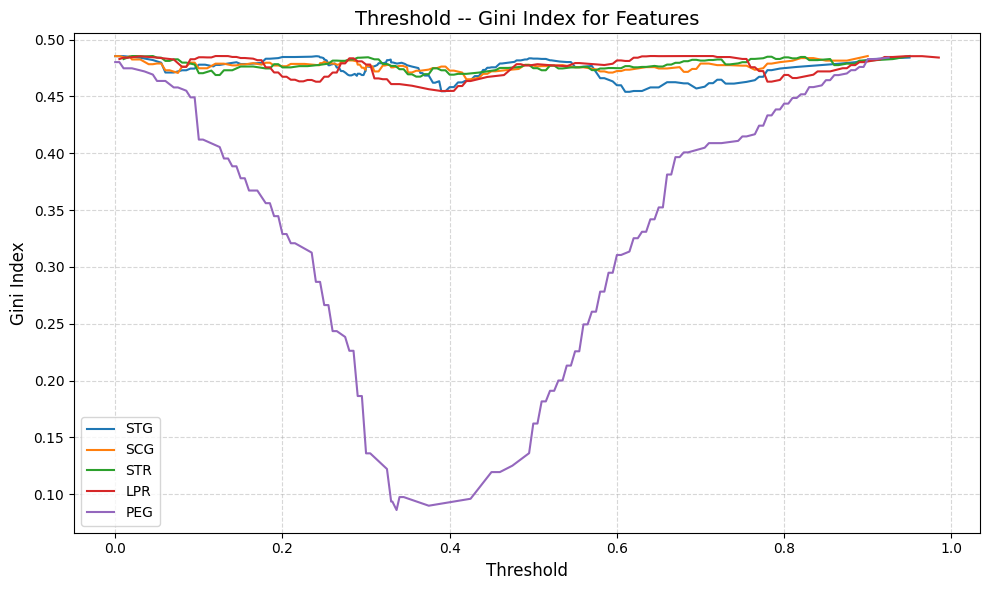

In [ ]:
# plotting five different lines 'threshold-Gini index'
data = pd.read_csv('students.csv')

features = ['STG', 'SCG', 'STR', 'LPR', 'PEG']
target_vector = data['UNS'].values

fig, ax = plt.subplots(figsize=(10, 6))

# iterating over all the features:
for feature in features:
  feature_vector = data[feature].values

  # calculating thresholds and Gini indices
  thresholds, gini_values, threshold_best, gini_best = find_best_split(feature_vector, target_vector)

  # plotting the 'threshold-Gini index' diagram for the current feature:
  ax.plot(thresholds, gini_values, label=feature)

# adding all the additional piece of information:
ax.set_xlabel('Threshold', fontsize=12)
ax.set_ylabel('Gini Index', fontsize=12)
ax.set_title('Threshold -- Gini Index for Features', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()

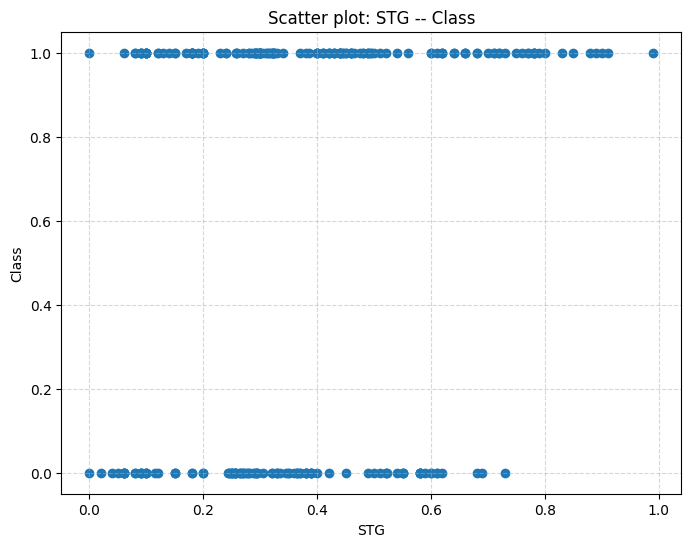

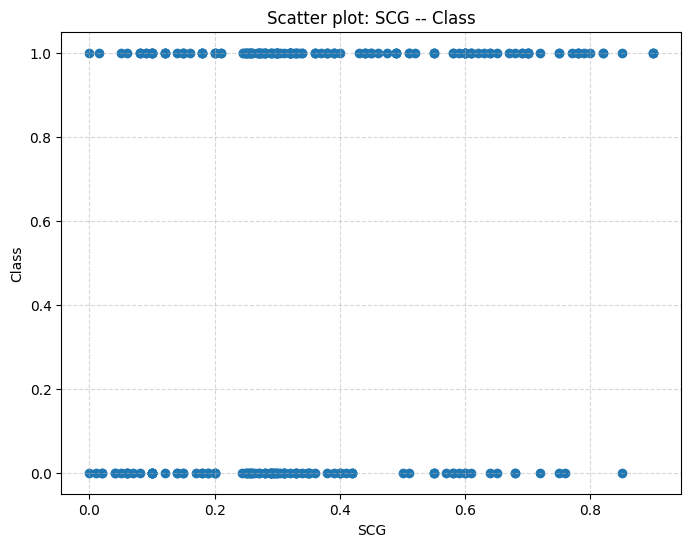

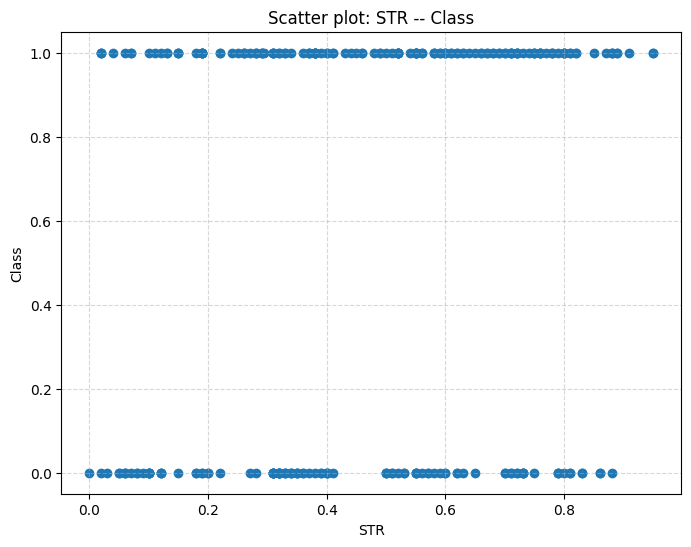

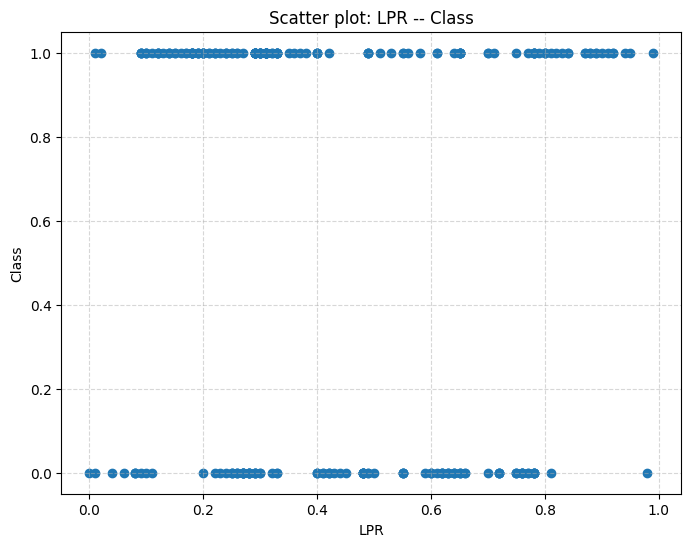

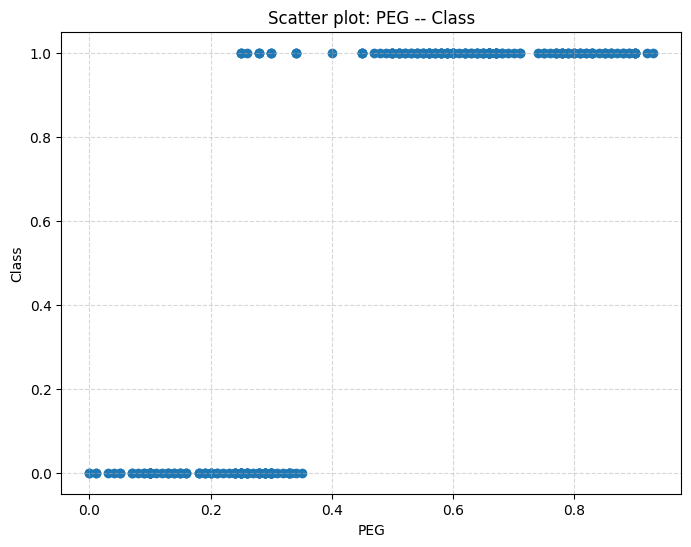

In [ ]:
# plotting five different scatter diagrams 'feature value - class'
for feature in features:
  plt.figure(figsize=(8, 6))
  plt.scatter(data[feature], data['UNS'])
  plt.xlabel(feature)
  plt.ylabel('Class')
  plt.title(f'Scatter plot: {feature} -- Class')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.show()

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой диаграмм рассеяиния? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

In [ ]:
# Исходя из кривых значений критерия Джини для каждого признака, признак 'PEG' является
# оптимальным выбором для осуществления разделения выборки на два поддерева (поскольку в таком
# случае значение критерия Джини оказывается минимальным).
# Это согласуется с данными, полученными в ходе анализа диаграммы рассеивания, где четко видно, 
# что существует определенное значение признака, которое является пограничным и позволит разделить
# выборку на два поддерева (<= этого значения - в левое поддерево, иначе - в правое).
# Для 'хороших' признаков кривая имеет ступенчатый вид. При использовании разных порогов 
# значение индекса Джини будет либо увеличиваться, либо уменьшаться. При этом видно некоторое 'оптимальное'
# значение порога, по которому можно сделать хорошее разбиение. И наоборот, кривые для признаков, по которым
# деление практически невозможно, напоминают горизонтальную прямую. Здесь, каким ни было значение порога,
# очень сложно достичь какого-либо хорошего разбиения на поддеревья. Такие признаки неинформативны в подобных задачах.

# ВАЖНО: перевернутый вид графика является корректным, поскольку он правильно отражает значение порога,
# который является оптимальным при разбиении вершины дерева надвое, ведь мы ищем тот признак и тот оптимальный порог,
# при котором мы сможем достичь наименьшего значения impurity. 

**Задание 2.4 (1 балл)** Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). 

1. Скачайте таблицу `agaricus-lepiota.data` (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), 
2. Считайте таблицу при помощи `pandas`,
3. Примените к каждому столбцу `LabelEncoder` (из `sklearn`), чтобы преобразовать строковые имена категорий в натуральные числа. 

Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
data = pd.read_csv('agaricus-lepiota.data', header=None)
data.head()

--2023-06-03 11:19:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 373704 (365K) [application/x-httpd-php]
Saving to: ‘agaricus-lepiota.data.1’

agaricus-lepiota.da 100%[===================>] 364.95K  1.05MB/s    in 0.3s    

2023-06-03 11:19:49 (1.05 MB/s) - ‘agaricus-lepiota.data.1’ saved [373704/373704]



,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
from sklearn.preprocessing import LabelEncoder
# creating an instance of LabelEncoder
label_encoder = LabelEncoder()

# encoding the data:
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# getting the features' values and target value
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

# splitting into train and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=34)

# creating an instance of DecisionTree
decision_tree = DecisionTree(feature_types=["categorical" for _ in range(22)])
decision_tree.fit(X_train, y_train)

# predicting the values and calculating accuracy:
prediction = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, prediction)

print(f'The accuracy score on test: {accuracy}')

**Примечание:** функция find_best_split отдельно отрабатывает довольно долго. У меня на CPU уходит примерно 5 минут. В DecisionTree она вызывается несколько раз, поэтому обучение дерева длится очень долго. Коллаб слетает, поэтому при прогоне кода желательно использовать GPU. В целом, реализация дерева кажется вполне корректной с учетом всех критерий останова (их там два по условиям задания) и соблюдения условия касаемо глубины рекурсии. Поэтому это задания может **не отработать за короткое время.**

## Часть 3: Бэггинг и случайный лес (4 балла)

В данной части мы будем работать [с задачей предсказания диабета у пациента](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data). Посмотрим на работу бэггинга над решающими деревьями и случайного леса, сравним их работу.

In [11]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [12]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anastasiialapshina","key":"a3cfa37b22f6054dc8439a15991b4a58"}'}

In [13]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [14]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database
!unzip pima-indians-diabetes-database.zip

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 19.0MB/s]
Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [15]:
data = pd.read_csv('diabetes.csv')
print(f"Dataset shape: {data.shape}")
data.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Посмотрим на распределение целевой переменной

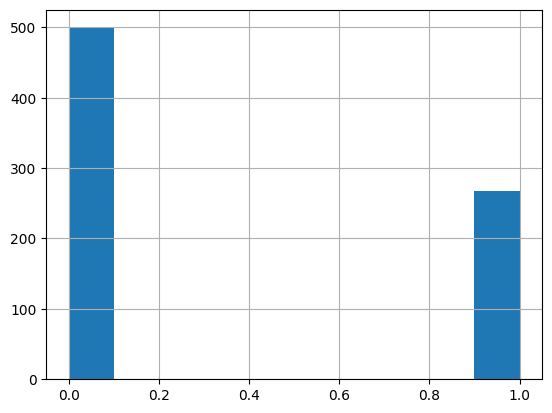

In [16]:
data['Outcome'].hist()
plt.show()

**Задание 3.1 (0.5 балла)** Разделите данные на признаки и целевую переменную. Разбейте датасет на обучающую и тестовую части в отношении 7:3. Затем разделите обучающую выборку на обучающую-обучающую и обучающую-валидационную в соотношении 7:3 (то есть в итоге должно получиться три выборки: обучающая-обучающая (0.49 от исходного датасета), обучающая-валидационная (0.21 от исходного датасета) и тестовая (0.3 от исходного датасета).

In [17]:
# splitting into features and target values:
X = data.iloc[:, 0:8].values
y = data["Outcome"].values

# train and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=17)

# further splitting the train part
X_train_train, X_train_validation, y_train_train, y_train_validation = train_test_split(X_train, y_train, test_size = 0.3, random_state=19 )


**Задание 3.2 (1 балл)** На обучающей-валидационной выборке подберите оптимальные значения гиперпараметров `max_depth` и `min_samples_leaf` для `DecisionTreeClassifier`. Для этого:
1. Создайте списки с возможными значениями для перебора.
2. Для каждой пары значений обучите дерево на обучающей-обучающей выборке и определите качество на обучающей-валидационной выборке. В качестве критерия будем использовать `f1-меру`.
3. Выберите ту пару значений, которая даёт наилучшее качество на обучающей-валидационной выборке. 


Обучите решающее дерево с подобранными гиперпараметрами на **полной обучающей** выборке. Оцените качество классификации на тестовой выборке по метрикам `accuracy`, `precision` и `recall`, `auc_roc`.

In [18]:
# setting values for max_depth and min_samples_leaf
max_depth_values = [1, 2, 3, 5, 6, 8]
min_samples_leaf_values = [1, 2, 3, 4, 5, 6]

# setting the initial values for best parameters:
best_max_depth = 0
best_min_samples = 0
max_f1_score = 0

# iterating over each list and calculating the values for accuracy
for depth in max_depth_values:
  for samples_number in min_samples_leaf_values:
    # creating an instance of a model and fitting our data:
    decision_tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples_number)
    decision_tree.fit(X_train_train, y_train_train)

    # predicting the values of target variable and calculating accuracy
    predictions = decision_tree.predict(X_train_validation)
    f1 = f1_score(y_train_validation, predictions)

    # updating best values 
    if f1 > max_f1_score:
      max_f1_score = f1
      best_max_depth = depth
      best_min_samples = samples_number

print(f"Best 'max_depth' value is {best_max_depth}")
print(f"Best 'min_samples_leaf' values is {best_min_samples}")
print(f"Best F1-score is {max_f1_score}")

Best 'max_depth' value is 8
Best 'min_samples_leaf' values is 5
Best F1-score is 0.5504587155963302


In [19]:
# another way to iterate over all the possible combinations of parameters (more efficient)
from sklearn.model_selection import GridSearchCV

# dict with different parameters
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]
}

# creating an instance of GridSearchCV and fitting the model
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='f1')
grid_search.fit(X_train_train, y_train_train)

# getting the best values of parameters
print("Best 'max_depth' value:", grid_search.best_params_['max_depth'])
print("Best 'min_samples_leaf' value:", grid_search.best_params_['min_samples_leaf'])
print("Best F1-score:", grid_search.best_score_)

Best 'max_depth' value: 5
Best 'min_samples_leaf' value: 7
Best F1-score: 0.6712782366425094


In [20]:
# creating an instance of a model with the selected parameters values:
tree_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)
tree_model.fit(X_train, y_train)

# making predictions and evaluating the model:
tree_predictions = tree_model.predict(X_test)

accuracy = accuracy_score(y_test, tree_predictions)
precision = precision_score(y_test, tree_predictions)
recall = recall_score(y_test, tree_predictions)
auc_roc = roc_auc_score(y_test, tree_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC ROC: {auc_roc}")

Accuracy: 0.7489177489177489
Precision: 0.6385542168674698
Recall: 0.654320987654321
AUC ROC: 0.7271604938271605


**Задание 3.3 (0.5 балла)** Обучите [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на 50 деревьях на **полной обучающей** выборке. Оцените качество классификации на тестовой выборке по тем же метрикам.

In [21]:
# creating an instance of classifier and fitting the data
bagging_classifier = BaggingClassifier(n_estimators=50)
bagging_classifier.fit(X_train, y_train)

# making predictions and evaluating their quality
y_pred = bagging_classifier.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"AUC ROC: {roc_auc_score(y_test, y_pred)}")

Accuracy: 0.7835497835497836
Precision: 0.7123287671232876
Recall: 0.6419753086419753
AUC ROC: 0.7509876543209876


**Задание 3.4 (1 балл)** Выполните кросс-валидацию на полной обучающей выборке и подберите оптимальные значения гиперпараметров `max_depth` и `min_samples_split` для `Random Forest` с 50 деревьями. Для этого:

1. Создайте списки с возможными значениями для перебора.
2. Для каждой пары значений проведите кросс-валидацию на полной обучающей выборке. Количество разбиений выберите на ваш вкус. В качестве критерия будем использовать `f1-меру`. Усредните значение критерия по всем прогонам кросс-валидации. 
3. Выберите ту пару значений, которая даёт наилучшее среднее качество. 

Обучите случайный лес с подобранными гиперпараметрами на **полной обучающей** выборке. Оцените качество классификации по тем же метрикам. Какая из трёх построенных моделей показала себя лучше?

In [22]:
# creating lists of possible values of parameters and a grid
max_depth_parameters = [2, 3, 4, 5, 6, 7, 8]
min_samples_parameters = [2, 3, 4, 5, 6, 7]
grid_of_param = {'max_depth': max_depth_parameters, 'min_samples_split': min_samples_parameters}

# creating an instance of a model and a scorer
random_forest_model = RandomForestClassifier(n_estimators=50)

# cross-validation with 4 folds
grid_search_CV = GridSearchCV(random_forest_model, grid_of_param, scoring="f1", cv=4)
grid_search_CV.fit(X_train, y_train)

# getting the results
best_max_depth = grid_search_CV.best_params_['max_depth']
best_min_samples_split = grid_search_CV.best_params_['min_samples_split']
print("Best 'max_depth':", best_max_depth)
print("Best 'min_samples_split':", best_min_samples_split)
print("Best F1-score:", grid_search.best_score_)

Best 'max_depth': 8
Best 'min_samples_split': 7
Best F1-score: 0.6712782366425094


In [23]:
# training a model with the chosen values of parameters
random_forest = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_split=5)
random_forest.fit(X_train, y_train)

# making predictions and evaluating their the quality thereof
y_pred_forest = random_forest.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_forest)}")
print(f"Precision: {precision_score(y_test, y_pred_forest)}")
print(f"Recall: {recall_score(y_test, y_pred_forest)}")
print(f"AUC ROC: {roc_auc_score(y_test, y_pred_forest)}")

Accuracy: 0.7922077922077922
Precision: 0.7538461538461538
Recall: 0.6049382716049383
AUC ROC: 0.7491358024691358


**ВЫВОДЫ:** из всех обученных моделей, лучшими по метрикам оказались модели BaggingClassifier и RandomForest на основе 50 деревьев. Их показатели по метрикам оказались самыми высокими среди всех.

**Задание 3.5 (0.5 балла)** Постройте график зависимости AUC ROC на тестовой выборке от числа деревьев (`n_estimators`) для случайного леса, обучаемого на **полной обучающей** выборке. Какие выводы можно сделать?

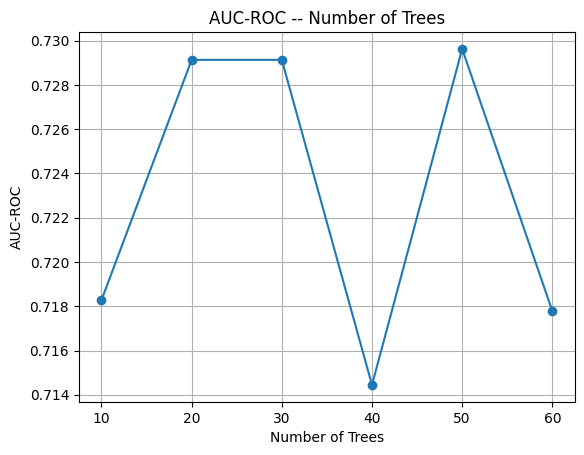

In [26]:
# creating lists to store parameters and results
n_estimators_values = [10, 20, 30, 40, 50, 60]
auc_roc_values = []

# getting results
for n_estimator in n_estimators_values:
  model = RandomForestClassifier(n_estimators = n_estimator)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  auc_roc_values.append(roc_auc_score(y_test, y_pred))

# plotting the graph
plt.plot(n_estimators_values, auc_roc_values, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('AUC-ROC')
plt.title('AUC-ROC -- Number of Trees')
plt.grid(True)
plt.show()

# ВЫВОДЫ: значение n_estimators=50 (50 деревьев) является оптимальным среди рассматриваемых,
# судя по показателям AUC-ROC. Значения в 20 и 30 деревьев также показывают неплохие результаты.
# В то же время, использование для обучения модлеи 10, 40 или 60 деревьев приведет к низким значениям
# метрики AUC-ROC.

**Задание 3.6 (0.5 балла)** Для лучшей модели случайного леса из **Задания 3.4** посчитайте важность признаков и постройте bar plot. Какой признак оказался самым важным для определения диабета?

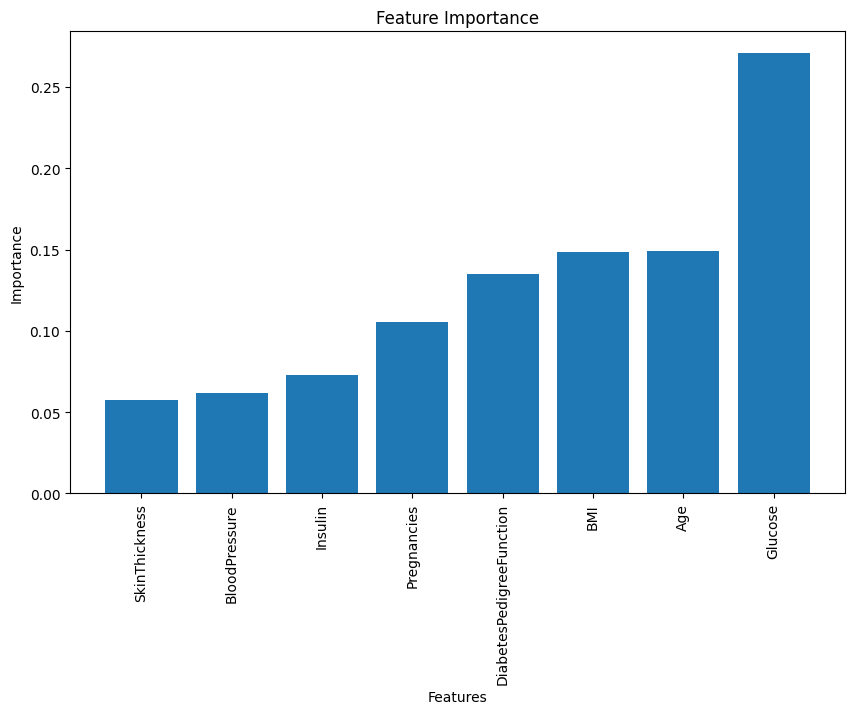

In [36]:
# working with a random forest model
# getting the importance of features
feature_importances = random_forest.feature_importances_
feature_names = data.iloc[:, 0:8].columns
sorted_indices = feature_importances.argsort()

# plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_names[sorted_indices], feature_importances[sorted_indices])
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# ВЫВОД: сам важным признаком для определения наличия или отсутствия у пациента
# диабета является признак "Glucose", показывающий уровень сахара в крови человека.
# Остальные признаки оказались значительно менее значимыми в задаче определения диабета.